In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
boston_data = load_boston()
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
column_names = [name.lower() for name in boston_data.feature_names]
column_names

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

In [5]:
boston_df = pd.DataFrame(boston_data.data, columns=column_names)

In [6]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df['medv'] = boston_data.target

In [8]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


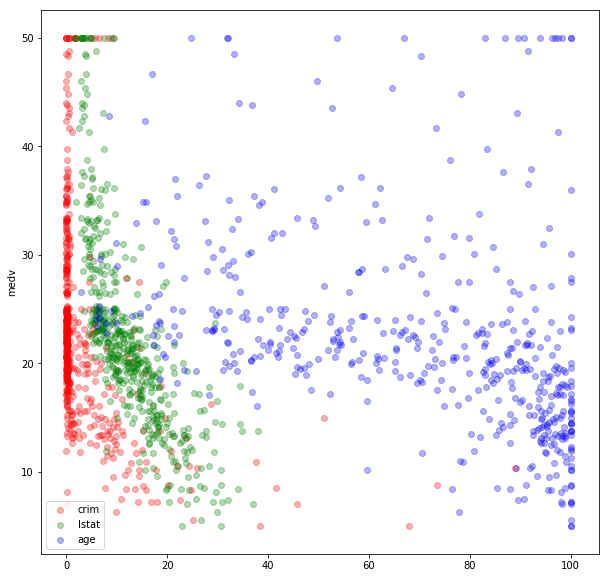

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for feature, color in zip(['crim', 'lstat', 'age'], ['r', 'g', 'b']):
    ax.scatter(x=boston_df[feature].values, y=boston_df.medv.values, color=color, alpha=0.3, label=feature)
ax.set_ylabel('medv')
ax.legend(loc='best')

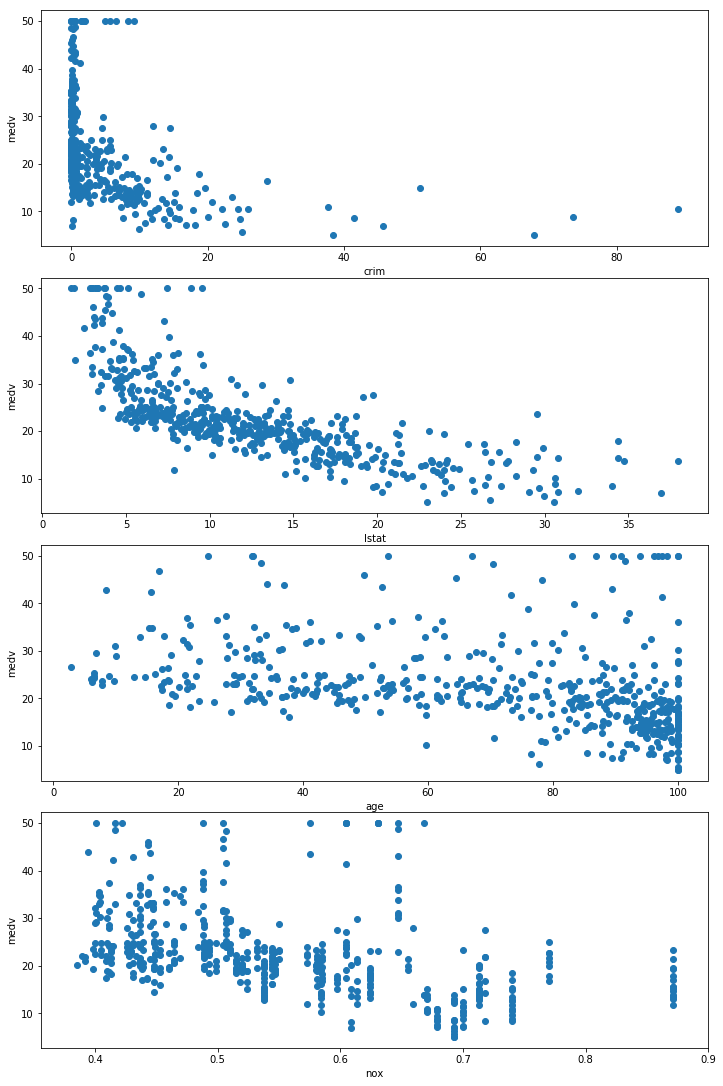

In [25]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
plt.tight_layout()
for ax, feature in zip(axes, ['crim', 'lstat', 'age', 'nox']):
    ax.scatter(x=boston_df[feature], y=boston_df['medv'].values)
    ax.set_xlabel(feature)
    ax.set_ylabel('medv')

In [28]:
X = boston_df.drop('medv', axis=1).values
y = boston_df['medv'].values
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_model.score(X, y)

0.7406426641094095

In [31]:
linear_model = LinearRegression()
X = boston_df.drop('medv', axis=1).values
y = boston_df['medv'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.7261570836552479

In [42]:
linear_model = LinearRegression()
X = boston_df.drop('medv', axis=1).values
y = boston_df['medv'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.7018493649886874

In [43]:
linear_model.intercept_

35.11442599048514

In [45]:
list(zip(linear_model.coef_, column_names))

[(-0.052338424522124165, 'crim'),
 (0.03353131272474338, 'zn'),
 (0.10322597373528894, 'indus'),
 (3.1462353662682303, 'chas'),
 (-19.74995983236701, 'nox'),
 (4.146201035831956, 'rm'),
 (0.008908479656199559, 'age'),
 (-1.3189035151346022, 'dis'),
 (0.3142699500125576, 'rad'),
 (-0.011728979358917155, 'tax'),
 (-1.0601559380524563, 'ptratio'),
 (0.010449531092127803, 'b'),
 (-0.5682545582270199, 'lstat')]

In [50]:
linear_model = LinearRegression()
X = boston_df[['nox', 'rm', 'chas', 'dis', 'ptratio']].values
y = boston_df['medv'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.6292777045962618